<a href="https://colab.research.google.com/github/machiwao/ml-development/blob/main/Kaggle_Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic
Reference: https://www.kaggle.com/competitions/spaceship-titanic/overview


In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [195]:
df = pd.read_csv('train.csv')
dt = pd.read_csv('test.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [196]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [198]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [199]:
df['Transported'].value_counts()

,count
Transported,
True,4378
False,4315


In [200]:
df.duplicated().sum()

0

In [201]:
for col in df.columns:
    print(col, df[col].unique())

PassengerId ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet ['Europa' 'Earth' 'Mars' nan]
CryoSleep [False True nan]
Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP [False True nan]
RoomService [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall [   0.   25.  371. ... 1085.  510. 1872.]
Spa [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck [   0.   44.   49. ... 1164.  971. 3235.]
Name ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']

In [202]:
for col in df.columns:
    print(col, df[col].unique())

PassengerId ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet ['Europa' 'Earth' 'Mars' nan]
CryoSleep [False True nan]
Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP [False True nan]
RoomService [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall [   0.   25.  371. ... 1085.  510. 1872.]
Spa [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck [   0.   44.   49. ... 1164.  971. 3235.]
Name ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']

## Initial Data Visualization

In [170]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
target_col = ['Transported']

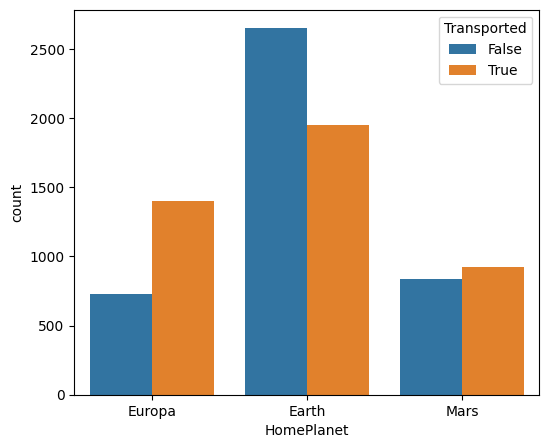

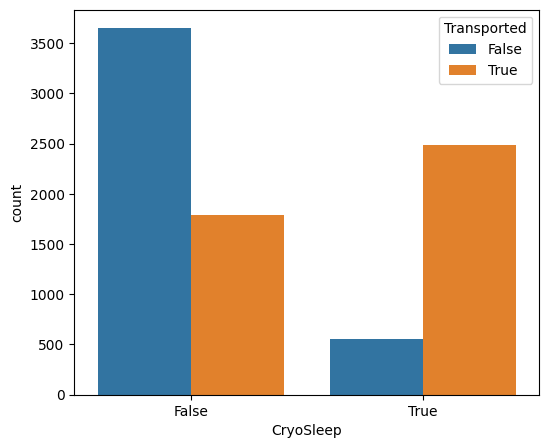

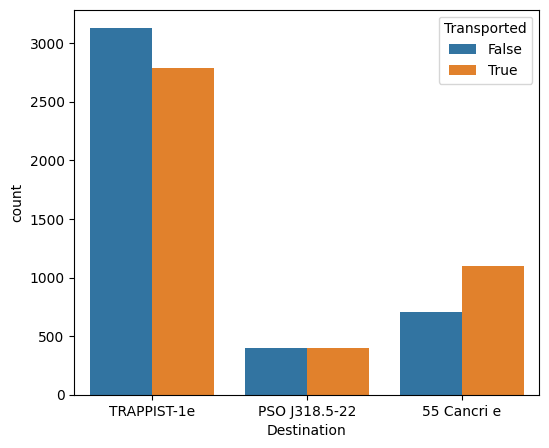

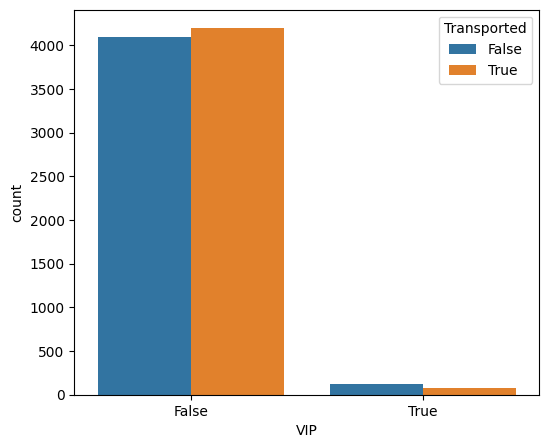

In [171]:
for col in categorical_cols:
    plt.figure(figsize=(6, 5))
    sns.countplot(x=col, data=df, hue=target_col[0])
    plt.show()

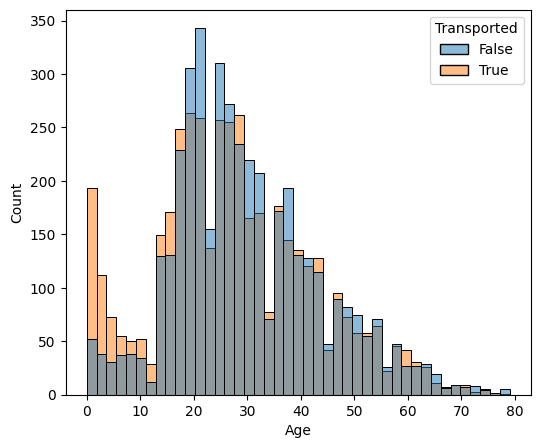

In [172]:
plt.figure(figsize=(6, 5))
sns.histplot(x='Age', data=df, hue=target_col[0])
plt.show()

In [173]:
pd.pivot_table(df, index='Transported', values=numerical_cols, aggfunc='mean')

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,382.615930,389.266066,167.566217,564.382666,543.629822
True,27.748834,532.691984,63.098021,179.829972,61.675531,69.148131


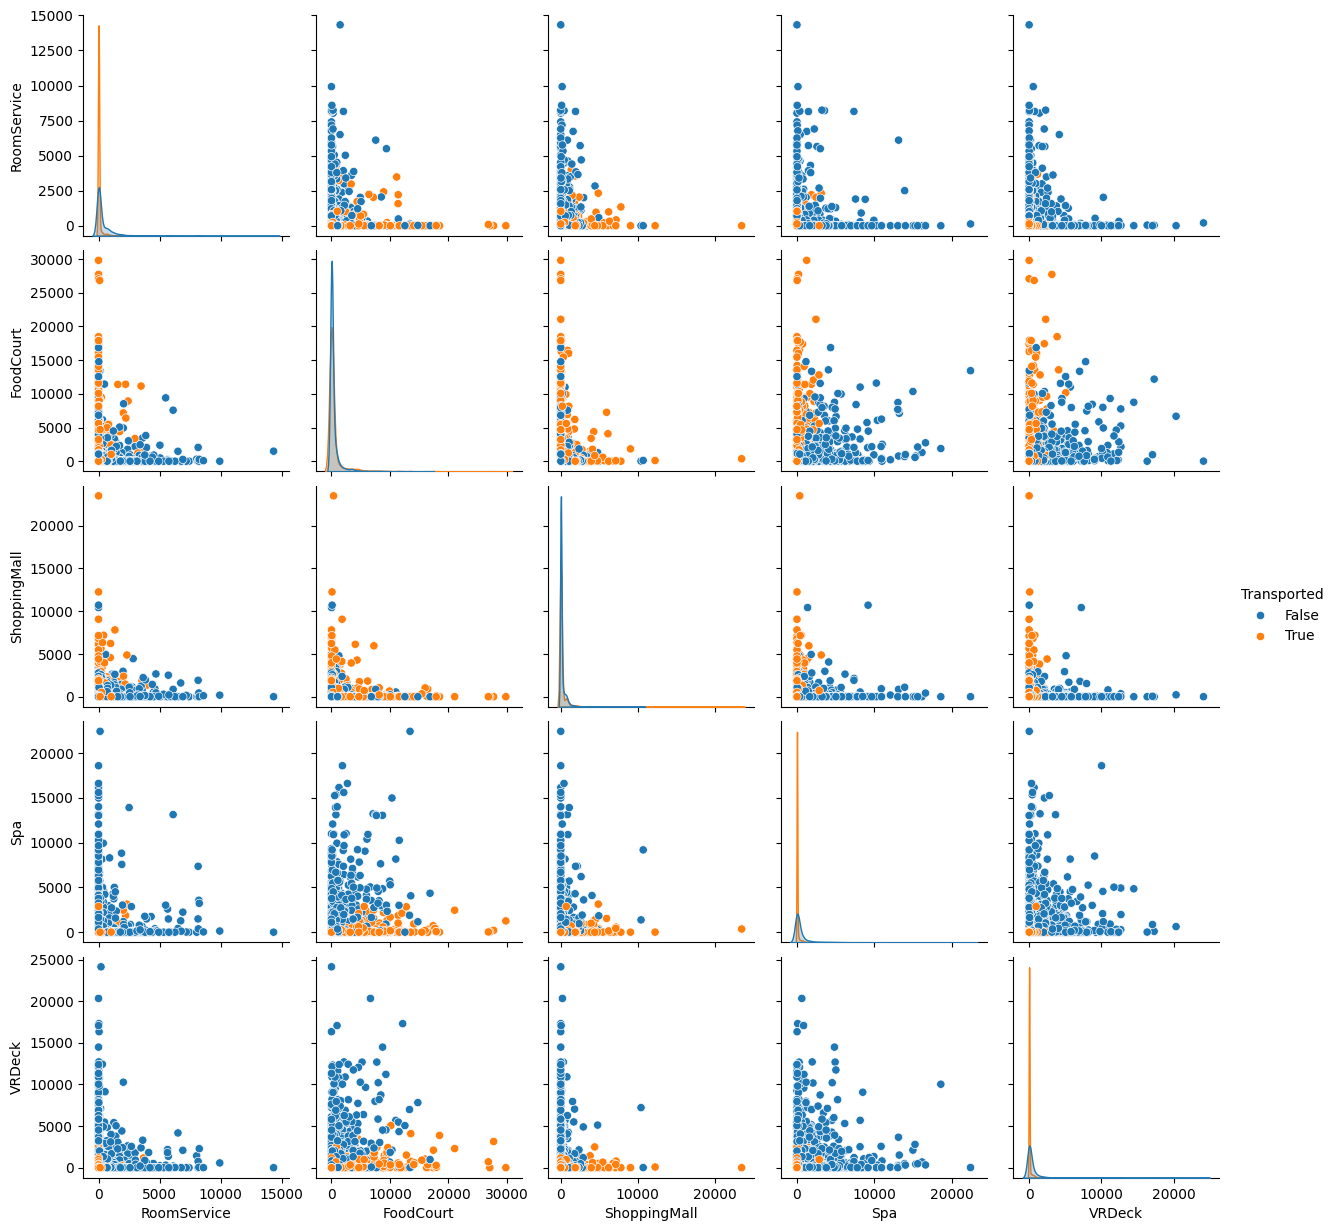

In [174]:
sns.pairplot(df, vars=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], hue=target_col[0])
plt.show()

## Feature Engineering

In [137]:
df.drop(['Name'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


## Generate New Features

In [138]:
df['PassengerGroup'] = df['PassengerId'].apply(lambda x: x.split('_')[0])
df['PassengerNumber'] = df['PassengerId'].apply(lambda x: x.split('_')[1])
df.drop(['PassengerId'], axis=1, inplace=True)

In [139]:
df['CabinDeck'] = df['Cabin'].fillna('').apply(lambda x: x.split('/')[0] if x else np.nan)
df['CabinNum'] = df['Cabin'].fillna('').apply(lambda x: x.split('/')[1] if x else np.nan)
df['CabinSide'] = df['Cabin'].fillna('').apply(lambda x: x.split('/')[2] if x else np.nan)
df.drop(['Cabin'], axis=1, inplace=True)

In [140]:
def classify_age(age):
    if age <= 12:
        return 'Child'
    elif 13 <= age <= 19:
        return 'Teenager'
    elif 20 <= age <= 35:
        return 'Young Adult'
    elif 36 <= age <= 50:
        return 'Middle-aged Adult'
    elif 51 <= age <= 65:
        return 'Older Adult'
    else:
        return 'Senior'

In [141]:
df['AgeGroup'] = df['Age'].apply(classify_age)
df.drop(['Age'], axis=1, inplace=True)

In [142]:
df['TotalExpenses'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8492 non-null   object 
 1   CryoSleep        8476 non-null   object 
 2   Destination      8511 non-null   object 
 3   VIP              8490 non-null   object 
 4   Transported      8693 non-null   bool   
 5   PassengerGroup   8693 non-null   object 
 6   PassengerNumber  8693 non-null   object 
 7   CabinDeck        8494 non-null   object 
 8   CabinNum         8494 non-null   object 
 9   CabinSide        8494 non-null   object 
 10  AgeGroup         8693 non-null   object 
 11  TotalExpenses    7785 non-null   float64
dtypes: bool(1), float64(1), object(10)
memory usage: 755.7+ KB


In [144]:
df.isnull().sum()

,0
HomePlanet,201
CryoSleep,217
Destination,182
VIP,203
Transported,0
PassengerGroup,0
PassengerNumber,0
CabinDeck,199
CabinNum,199
CabinSide,199


### Handling Missing Values

In [145]:
df['HomePlanet'].fillna("None stated", inplace=True)
df['CryoSleep'].fillna("None stated", inplace=True)
df['Destination'].fillna("None stated", inplace=True)
df['VIP'].fillna("None stated", inplace=True)
df['CabinDeck'].fillna("None stated", inplace=True)
df['CabinNum'].fillna("None stated", inplace=True)
df['CabinSide'].fillna("None stated", inplace=True)
df['TotalExpenses'].fillna(0, inplace=True)

In [146]:
df.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
VIP,0
Transported,0
PassengerGroup,0
PassengerNumber,0
CabinDeck,0
CabinNum,0
CabinSide,0


In [147]:
df.duplicated().sum()

0

In [148]:
for label in df.columns:
    print(label, df[label].unique())

HomePlanet ['Europa' 'Earth' 'Mars' 'None stated']
CryoSleep [False True 'None stated']
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' 'None stated']
VIP [False True 'None stated']
Transported [False  True]
PassengerGroup ['0001' '0002' '0003' ... '9278' '9279' '9280']
PassengerNumber ['01' '02' '03' '04' '05' '06' '07' '08']
CabinDeck ['B' 'F' 'A' 'G' 'None stated' 'E' 'D' 'C' 'T']
CabinNum ['0' '1' '2' ... '1892' '1893' '1894']
CabinSide ['P' 'S' 'None stated']
AgeGroup ['Middle-aged Adult' 'Young Adult' 'Older Adult' 'Teenager' 'Child'
 'Senior']
TotalExpenses [    0.   736. 10383. ...  8536.  1873.  4637.]


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8693 non-null   object 
 1   CryoSleep        8693 non-null   object 
 2   Destination      8693 non-null   object 
 3   VIP              8693 non-null   object 
 4   Transported      8693 non-null   bool   
 5   PassengerGroup   8693 non-null   object 
 6   PassengerNumber  8693 non-null   object 
 7   CabinDeck        8693 non-null   object 
 8   CabinNum         8693 non-null   object 
 9   CabinSide        8693 non-null   object 
 10  AgeGroup         8693 non-null   object 
 11  TotalExpenses    8693 non-null   float64
dtypes: bool(1), float64(1), object(10)
memory usage: 755.7+ KB


## Final Data Visualization

In [150]:
categorical = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'AgeGroup', 'CabinDeck', 'CabinSide']

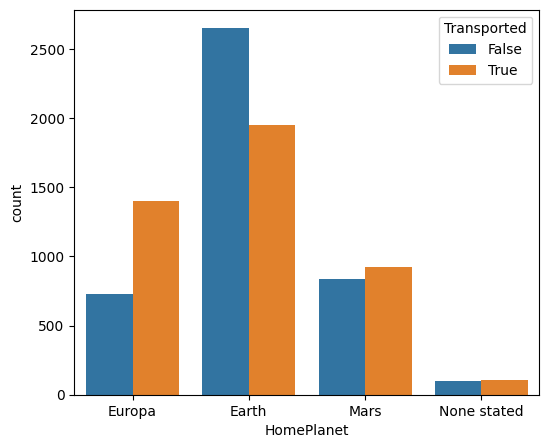

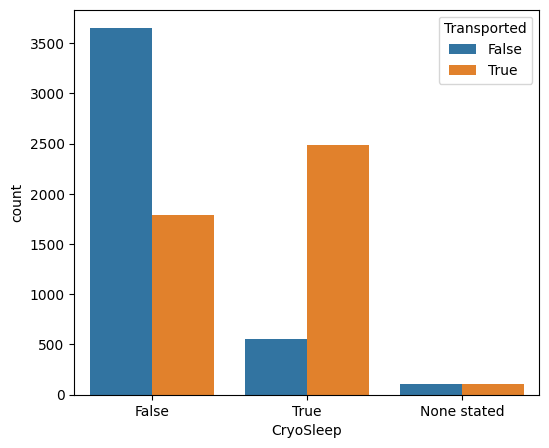

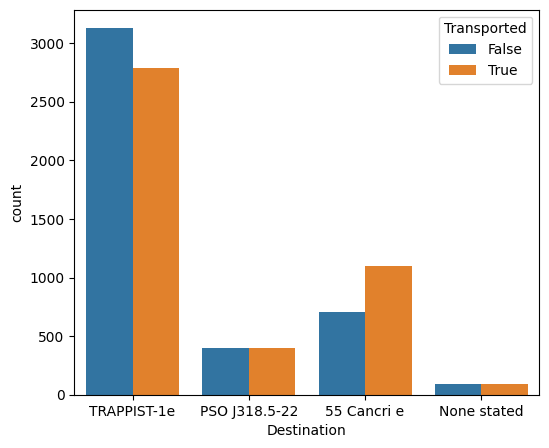

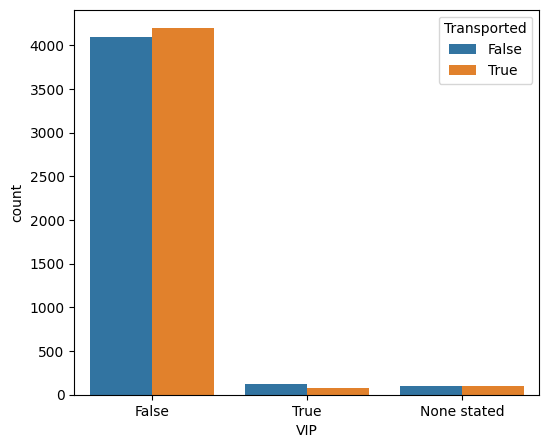

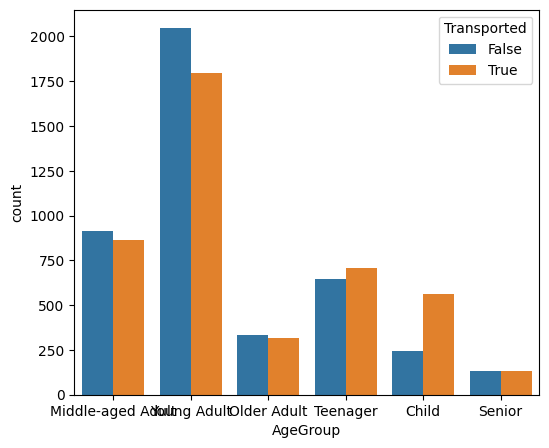

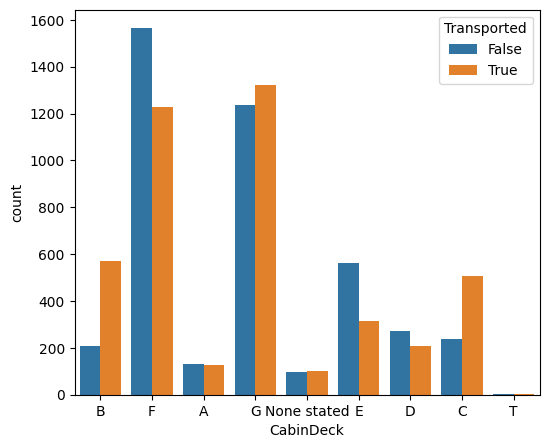

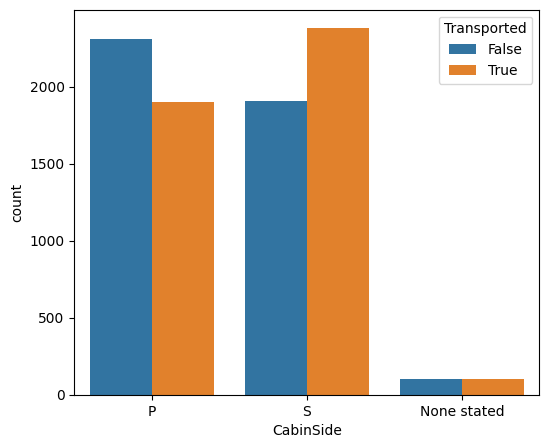

In [151]:
for col in categorical:
    plt.figure(figsize=(6, 5))
    sns.countplot(x=col, data=df, hue=target_col[0])
    plt.show()

<Figure size 800x600 with 0 Axes>

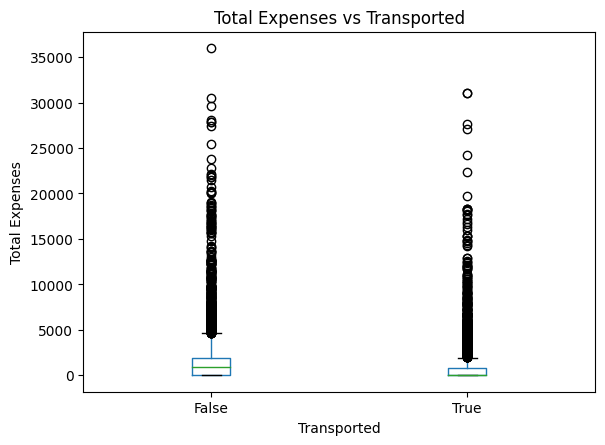

In [152]:
plt.figure(figsize=(8, 6))
df.boxplot(column='TotalExpenses', by='Transported', grid=False)

plt.title('Total Expenses vs Transported')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Transported')
plt.ylabel('Total Expenses')
plt.show()

## One-hot Encoding

In [153]:
df = pd.get_dummies(df, columns=categorical, drop_first=True)

In [154]:
df['Transported'] = df['Transported'].astype(int)
df['PassengerGroup'] = df['PassengerGroup'].astype(int)
df['PassengerNumber'] = df['PassengerNumber'].astype(int)

In [155]:
le = LabelEncoder()
df['CabinNum'] = le.fit_transform(df['CabinNum'])

In [156]:
df.corr()['Transported'].sort_values(ascending=False)

,Transported
Transported,1.000000
CryoSleep_True,0.460132
HomePlanet_Europa,0.176916
CabinDeck_B,0.144733
CabinDeck_C,0.108193
CabinSide_S,0.101455
PassengerNumber,0.066390
PassengerGroup,0.021491
HomePlanet_Mars,0.019544
CabinNum,0.019015


## Data Preparation

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [204]:
# Base Features
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
target_col = ['Transported']

In [205]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8693 non-null   int64  
 4   Destination   8693 non-null   int64  
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(5), object(2)
memory usage: 891.5+ KB


In [207]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,179
VIP,0
RoomService,181
FoodCourt,183
ShoppingMall,208


In [208]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['RoomService'].fillna(0, inplace=True)
df['FoodCourt'].fillna(0, inplace=True)
df['ShoppingMall'].fillna(0, inplace=True)
df['Spa'].fillna(0, inplace=True)
df['VRDeck'].fillna(0, inplace=True)

In [215]:
df.drop(['Name'], axis = 1).corr()['Transported'].abs().sort_values(ascending=False)

,Transported
Transported,1.000000
CryoSleep,0.404716
RoomService,0.241124
Spa,0.218545
VRDeck,0.204874
HomePlanet,0.107755
Destination,0.104817
Age,0.074249
Cabin,0.052604
FoodCourt,0.045583


In [188]:
X = df.drop(['Transported','Name'], axis=1)
y = df['Transported']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6954, 12) (1739, 12) (6954,) (1739,)


## Model Training

In [190]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

## Model Testing and Metrics

In [191]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.43      0.58       861
        True       0.63      0.94      0.75       878

    accuracy                           0.69      1739
   macro avg       0.75      0.69      0.66      1739
weighted avg       0.75      0.69      0.67      1739



Modified Features Accuracy = 0.72

In [216]:
sf = pd.read_csv('sample_submission.csv')
sf.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [ ]:
id = sf.pop('PassengerId')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': id,
    'Survived': y_pred.astype(int)
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")